## NumPy的应用-4

### 向量

**向量**（*vector*）也叫**矢量**，是一个同时具有大小和方向，且满足平行四边形法则的几何对象。与向量相对的概念叫**标量**或**数量**，标量只有大小，绝大多数情况下没有方向。我们通常用带箭头的线段来表示向量，在平面直角坐标系中的向量如下图所示。需要注意的是，向量是表达大小和方向的量，并没有规定起点和终点，所以相同的向量可以画在任意位置，例如下图中 $\small{\boldsymbol{w}}$ 和 $\small{\boldsymbol{u}}$ 两个向量并没有什么区别。

<img src="res/vector_1.png" style="zoom:40%;">

向量有很多种代数表示法，对于二维空间的向量，下面几种写法都是可以的。

$$
\boldsymbol{a} = \langle a_1, a_2 \rangle = (a_1, a_2) = \begin{pmatrix} a_1 \\\\ a_2 \end{pmatrix} = \begin{bmatrix} a_1 \\\\ a_2 \end{bmatrix}
$$

向量的大小称为向量的模，它是一个标量，对于二维空间的向量，模可以通过下面的公式计算。

$$
\lvert \boldsymbol{a} \rvert = \sqrt{a_{1}^{2} + a_{2}^{2}}
$$

注意，这里的 $\small{\lvert \boldsymbol{a} \rvert}$ 并不是绝对值，你可以将其称为向量 $\small{\boldsymbol{a}}$ 的二范数，这是数学中的符号重用现象。上面的写法和概念也可以推广到 $\small{n}$ 维空间，我们通常用 $\small{\boldsymbol{R^{n}}}$ 表示 $\small{n}$ 维空间，我们刚才说的二维空间可以记为 $\small{\boldsymbol{R^{2}}}$ ，三维空间可以记为 $\small{\boldsymbol{R^{3}}}$ 。虽然生活在三维空间的我们很难想象四维空间、五维空间是什么样子，但是这并不影响我们探讨高维空间，机器学习中，我们经常把有 $\small{n}$ 个特征的训练样本称为一个 $\small{n}$ 维向量。

#### 向量的加法

相同维度的向量可以相加得到一个新的向量，运算的方法是将向量的每个分量相加，如下所示。

$$
\boldsymbol{u} = \begin{bmatrix} u_1 \\\\ u_2 \\\\ \vdots \\\\ u_n \end{bmatrix}, \quad
\boldsymbol{v} = \begin{bmatrix} v_1 \\\\ v_2 \\\\ \vdots \\\\ v_n \end{bmatrix}, \quad
\boldsymbol{u} + \boldsymbol{v} = \begin{bmatrix} u_1 + v_1 \\\\ u_2 + v_2 \\\\ \vdots \\\\ u_n + v_n \end{bmatrix}
$$

向量的加法满足“平行四边形法则”，即两个向量 $\small{\boldsymbol{u}}$ 和 $\small{\boldsymbol{v}}$ 构成了平行四边形的两条邻边，相加的结果是平行四边形的对角线，如下图所示。

<img src="res/vector_2.png" style="zoom:58%;">

#### 向量的数乘

一个向量 $\small{\boldsymbol{v}}$ 可以和一个标量 $\small{k}$ 相乘，运算的方法是将向量中的每个分量与该标量相乘即可，如下所示。

$$
\boldsymbol{v} = \begin{bmatrix} v_1 \\\\ v_2 \\\\ \vdots \\\\ v_n \end{bmatrix}, \quad
k \cdot \boldsymbol{v} = \begin{bmatrix} k \cdot v_1 \\\\ k \cdot v_2 \\\\ \vdots \\\\ k \cdot v_n \end{bmatrix}
$$

我们可以用 NumPy 的数组来表示向量，向量的加法可以通过两个数组的加法来实现，向量的数乘可以通过数组和标量的乘法来实现，此处不再进行赘述。

#### 向量的点积

点积（*dot product*）是两个向量之间最为重要的运算之一，运算的方法是将两个向量对应分量的乘积求和，所以点积的结果是一个标量，其几何意义是两个向量的模乘以二者夹角的余弦如下所示。

$$
\boldsymbol{u} = \begin{bmatrix} u_1 \\\\ u_2 \\\\ \vdots \\\\ u_n \end{bmatrix}, \quad
\boldsymbol{v} = \begin{bmatrix} v_1 \\\\ v_2 \\\\ \vdots \\\\ v_n \end{bmatrix} \quad
$$

$$
\boldsymbol{u} \cdot \boldsymbol{v} = \sum_{i=1}^{n}{u_iv_i} = \lvert \boldsymbol{u} \rvert \lvert \boldsymbol{v} \rvert cos\theta
$$

假如我们用三维向量来表示用户对喜剧片、言情片和动作片这三类电影的偏好，我们用 1 到 5 的数字来表示喜欢的程度，其中 5 表示非常喜欢，4 表示比较喜欢，3 表示无感，2 表示比较反感，1 表示特别反感。那么，下面的向量表示用户非常喜欢喜剧片，特别反感言情片，对动作片不喜欢也不反感。

$$
\boldsymbol{u} = \begin{pmatrix} 5 \\\\ 1 \\\\ 3 \end{pmatrix}
$$

现在有两部电影上映了，一部属于言情喜剧片，一部属于喜剧动作片，我们把两部电影也通过3维向量的方式进行表示，如下所示。

$$
\boldsymbol{m_1} = \begin{pmatrix} 4 \\\\ 5 \\\\ 1 \end{pmatrix}, \quad \boldsymbol{m_2} = \begin{pmatrix} 5 \\\\ 1 \\\\ 5 \end{pmatrix}
$$

如果现在我们需要向刚才的用户推荐一部电影，我们应该给他推荐哪一部呢？我们可以将代表用户的向量 $\small{\boldsymbol{u}}$ 和代表电影的向量 $\small{\boldsymbol{m_{1}}}$ 和 $\small{\boldsymbol{m_{2}}}$ 分别进行点积运算，再除以向量的模长，得到向量夹角的余弦值，余弦值越接近 1，说明向量的夹角越接近 0 度，也就是两个向量的相似度越高。很显然，我们应该向用户推荐跟他观影喜好相似度更高的电影。

$$
cos\theta_1 = \frac{\boldsymbol{u} \cdot \boldsymbol{m1}}{|\boldsymbol{u}||\boldsymbol{m1}|} \approx \frac{4 \times 5 + 5 \times 1 + 3 \times 1}{5.92 \times 6.48} \approx 0.73
$$

$$
cos\theta_2 = \frac{\boldsymbol{u} \cdot \boldsymbol{m2}}{|\boldsymbol{u}||\boldsymbol{m2}|} \approx \frac{5 \times 5 + 1 \times 1 + 3 \times 5}{5.92 \times 7.14} \approx 0.97
$$

大家可能会说，向量 $\small{\boldsymbol{m_{2}}}$ 代表的电影肉眼可见跟用户是更加匹配的。的确，对于一个三维向量我们凭借直觉也能够给出正确的答案，但是对于一个 $\small{n}$ 维向量，当 $\small{n}$ 的值非常大时，你还有信心凭借肉眼的观察和本能的直觉给出准确的答案吗？向量的点积可以通过`dot`函数来计算，而向量的模长可以通过 NumPy 的`linalg`模块中的`norm`函数来计算，代码如下所示。

In [1]:
import numpy as np
u = np.array([5, 1, 3])
m1 = np.array([4, 5, 1])
m2 = np.array([5, 1, 5])
print(np.dot(u, m1) / (np.linalg.norm(u) * np.linalg.norm(m1)))  # 0.7302967433402214
print(np.dot(u, m2) / (np.linalg.norm(u) * np.linalg.norm(m2)))  # 0.9704311900788593

0.7302967433402215
0.9704311900788593


#### 向量的叉积

在二维空间，两个向量的叉积是这样定义的：

$$
\boldsymbol{A} = \begin{pmatrix} a_{1} \\\\ a_{2} \end{pmatrix}, \quad \boldsymbol{B} = \begin{pmatrix} b_{1} \\\\ b_{2} \end{pmatrix}
$$

$$
\boldsymbol{A} \times \boldsymbol{B} = \begin{vmatrix} a_{1} \quad a_{2} \\\\ b_{1} \quad b_{2} \end{vmatrix} = a_{1}b_{2} - a_{2}b_{1}
$$

对于三维空间，两个向量的叉积结果是一个向量，如下所示：

$$
\boldsymbol{A} = \begin{pmatrix} a_{1} \\\\ a_{2} \\\\ a_{3} \end{pmatrix}, \quad \boldsymbol{B} = \begin{pmatrix} b_{1} \\\\ b_{2} \\\\ b_{3} \end{pmatrix}
$$

$$
\boldsymbol{A} \times \boldsymbol{B} = \begin{vmatrix} \boldsymbol{\hat{i}} \quad \boldsymbol{\hat{j}} \quad \boldsymbol{\hat{k}} \\\\ a_{1} \quad a_{2} \quad a_{3} \\\\ b_{1} \quad b_{2} \quad b_{3} \end{vmatrix} = \langle \boldsymbol{\hat{i}}\begin{vmatrix} a_{2} \quad a_{3} \\\\ b_{2} \quad b_{3} \end{vmatrix}, -\boldsymbol{\hat{j}}\begin{vmatrix} a_{1} \quad a_{3} \\\\ b_{1} \quad b_{3} \end{vmatrix}, \boldsymbol{\hat{k}}\begin{vmatrix} a_{1} \quad a_{2} \\\\ b_{1} \quad b_{2} \end{vmatrix} \rangle
$$

因为叉积的结果是向量，所以 $\small{\boldsymbol{A} \times \boldsymbol{B}}$ 和 $\small{\boldsymbol{B} \times \boldsymbol{A}}$ 的结果并不相同，事实上：

$$
\boldsymbol{A} \times \boldsymbol{B} = -(\boldsymbol{B} \times \boldsymbol{A})
$$

NumPy 中可以通过`cross`函数来计算向量的叉积，代码如下所示。

```python
print(np.cross(u, m1))  # [-14   7  21]
print(np.cross(m1, u))  # [ 14  -7 -21]
```

### 行列式

**行列式**（*determinant*）通常记作 $\small{det(\boldsymbol{A})}$ 或 $\small{ \lvert \boldsymbol{A} \rvert}$ ，其中 $\small{\boldsymbol{A}}$ 是一个 $\small{n}$ 阶方阵。行列式可以看做是有向面积或体积的概念在一般欧几里得空间的推广，或者说行列式描述的是一个线性变换对“体积”所造成的影响。行列式的概念最早出现在解线性方程组的过程中，十七世纪晚期，关孝和（日本江户时代的数学家）与莱布尼茨的著作中已经使用行列式来确定线性方程组解的个数以及形式；十八世纪开始，行列式开始作为独立的数学概念被研究；十九世纪以后，行列式理论进一步得到发展和完善。

#### 行列式的性质

行列式是由向量引出的，所以行列式解释的其实是向量的性质。

**性质1**：如果 $\small{det(\boldsymbol{A})}$ 中某行（或某列）的元素全部为 0，那么 $\small{det(\boldsymbol{A}) = 0}$ 。

**性质2**：如果 $\small{det(\boldsymbol{A})}$ 中某行（或某列）有公共因子 $\small{k}$ ，则可以提出 $\small{k}$ ，得到行列式 $\small{det(\boldsymbol{A^{'}})}$ ，且 $\small{det(\boldsymbol{A}) = k \cdot det(\boldsymbol{A^{'}})}$ 。

$$
det(\boldsymbol{A})={\begin{vmatrix}a_{11}&a_{12}&\dots &a_{1n}\\\\\vdots &\vdots &\ddots &\vdots \\\\{\color {blue}k}a_{i1}&{\color {blue}k}a_{i2}&\dots &{\color {blue}k}a_{in}\\\\\vdots &\vdots &\ddots &\vdots \\\\a_{n1}&a_{n2}&\dots &a_{nn}\end{vmatrix}}={\color {blue}k}{\begin{vmatrix}a_{11}&a_{12}&\dots &a_{1n}\\\\\vdots &\vdots &\ddots &\vdots \\\\a_{i1}&a_{i2}&\dots &a_{in}\\\\\vdots &\vdots &\ddots &\vdots \\\\a_{n1}&a_{n2}&\dots &a_{nn}\end{vmatrix}}={\color {blue}k} \cdot det(\boldsymbol{A^{'}})
$$

**性质3**：如果 $\small{det(\boldsymbol{A})}$ 中某行（或某列）的每个元素是两数之和，则此行列式可拆分为两个行列式相加，如下所示。

$$
{\begin{vmatrix}a_{11}&a_{12}&\dots &a_{1n}\\\\\vdots &\vdots &\ddots &\vdots \\\\{\color {blue}a_{i1}}+{\color {OliveGreen}b_{i1}}&{\color {blue}a_{i2}}+{\color {OliveGreen}b_{i2}}&\dots &{\color {blue}a_{in}}+{\color {OliveGreen}b_{in}}\\\\\vdots &\vdots &\ddots &\vdots \\\\a_{n1}&a_{n2}&\dots &a_{nn}\end{vmatrix}}={\begin{vmatrix}a_{11}&a_{12}&\dots &a_{1n}\\\\\vdots &\vdots &\ddots &\vdots \\\\{\color {blue}a_{i1}}&{\color {blue}a_{i2}}&\dots &{\color {blue}a_{in}}\\\\\vdots &\vdots &\ddots &\vdots \\\\a_{n1}&a_{n2}&\dots &a_{nn}\end{vmatrix}}+{\begin{vmatrix}a_{11}&a_{12}&\dots &a_{1n}\\\\\vdots &\vdots &\ddots &\vdots \\\\{\color {OliveGreen}b_{i1}}&{\color {OliveGreen}b_{i2}}&\dots &{\color {OliveGreen}b_{in}}\\\\\vdots &\vdots &\ddots &\vdots \\\\a_{n1}&a_{n2}&\dots &a_{nn}\end{vmatrix}}
$$

**性质4**：如果 $\small{det(\boldsymbol{A})}$ 中两行（或两列）元素对应成比例，那么 $\small{det(\boldsymbol{A}) = 0}$ 。

**性质5**：如果 $\small{det(\boldsymbol{A})}$ 中两行（或两列）互换得到 $\small{det(\boldsymbol{A^{'}})}$ ，那么 $\small{det(\boldsymbol{A}) = -det(\boldsymbol{A^{'}})}$ 。

**性质6**：将 $\small{det(\boldsymbol{A})}$ 中某行（或某列）的 $\small{k}$ 倍加进另一行（或另一列）里，行列式的值不变，如下所示。

$$
{\begin{vmatrix}\vdots &\vdots &\vdots &\vdots \\\\ a_{i1}&a_{i2}&\dots &a_{in} \\\\ a_{j1}&a_{j2}&\dots &a_{jn}\\\\\vdots &\vdots &\vdots &\vdots \\\\ \end{vmatrix}}={\begin{vmatrix}\vdots &\vdots &\vdots &\vdots \\\\ a_{i1}&a_{i2}&\dots &a_{in} \\\\ a_{j1}{\color {blue}+ka_{i1}}&a_{j2}{\color {blue}+ka_{i2}}&\dots &a_{jn}{\color {blue}+ka_{in}} \\\\ \vdots &\vdots &\vdots &\vdots \\\\ \end{vmatrix}}
$$

**性质7**：将行列式的行列互换，行列式的值不变，如下所示。

$$
{\begin{vmatrix}a_{11}&a_{12}&\dots &a_{1n} \\\\ a_{21}&a_{22}&\dots &a_{2n} \\\\ \vdots &\vdots &\ddots &\vdots  \\\\ a_{n1}&a_{n2}&\dots &a_{nn}\end{vmatrix}}={\begin{vmatrix}a_{11}&a_{21}&\dots &a_{n1} \\\\ a_{12}&a_{22}&\dots &a_{n2} \\\\ \vdots &\vdots &\ddots &\vdots  \\\\ a_{1n}&a_{2n}&\dots &a_{nn}\end{vmatrix}}
$$

**性质8**：方块矩阵 $\small{\boldsymbol{A}}$ 和 $\small{\boldsymbol{B}}$ 的乘积的行列式等于其行列式的乘积，即 $\small{det(\boldsymbol{A}\boldsymbol{B}) = det(\boldsymbol{A})det(\boldsymbol{B})}$ 。特别的，若将矩阵中的每一行都乘以常数 $\small{r}$ ，那么行列式的值将是原来的 $\small{r^{n}}$ 倍，即 $\small{det(r\boldsymbol{A}) = det(r\boldsymbol{I_{n}} \cdot \boldsymbol{A}) = r^{n}det(\boldsymbol{A})}$ ，其中 $\small{\boldsymbol{I_{n}}}$ 是 $\small{n}$ 阶单位矩阵。

**性质9**：若 $\small{\boldsymbol{A}}$ 是可逆矩阵，那么 $\small{det(\boldsymbol{A}^{-1}) = (det(\boldsymbol{A}))^{-1}}$ 。

#### 行列式的计算

$\small{n}$ 阶行列式的计算公式如下所示：

$$
det(\boldsymbol{A})=\sum_{n!} \pm {a_{1\alpha}a_{2\beta} \cdots a_{n\omega}}
$$

对于二阶行列式，上面的公式相当于：

$$
\begin{vmatrix} a_{11} \quad a_{12} \\\\ a_{21} \quad a_{22} \end{vmatrix} = a_{11}a_{22} - a_{12}a_{21}
$$

对于三阶行列式，上面的计算公式相当于：

$$
\begin{vmatrix} a_{11} \quad a_{12} \quad a_{13} \\\\ a_{21} \quad a_{22} \quad a_{23} \\\\ a_{31} \quad a_{32} \quad a_{33} \end{vmatrix} = a_{11}a_{22}a_{33} + a_{12}a_{23}a_{31} + a_{13}a_{21}a_{32} - a_{11}a_{23}a_{32} - a_{12}a_{21}a_{33} - a_{13}a_{22}a_{31}
$$

高阶行列式可以用**代数余子式**（*cofactor*）展开成多个低阶行列式，如下所示：

$$
det(\boldsymbol{A})=a_{11}C_{11}+a_{12}C_{12}+ \cdots +a_{1n}C_{1n} = \sum_{i=1}^{n}{a_{1i}C_{1i}}
$$

其中， $\small{C_{11}}$ 是原行列式去掉 $\small{a_{11}}$ 所在行和列之后剩余的部分构成的行列式，以此类推。

### 矩阵

**矩阵**（*matrix*）是由一系列元素排成的矩形阵列，矩阵里的元素可以是数字、符号或数学公式。矩阵可以进行**加法**、**减法**、**数乘**、**转置**、**矩阵乘法**等运算，如下图所示。

<img src="res/matrix_operation.png" style="zoom:62%;">

值得一提的是矩阵乘法运算，该运算仅当第一个矩阵 $\small{\boldsymbol{A}}$ 的列数和另一个矩阵 $\small{\boldsymbol{B}}$ 的行数相等时才能定义。如果 $\small{\boldsymbol{A}}$ 是一个 $\small{m \times n}$ 的矩阵， $\small{\boldsymbol{B}}$ 是一个 $\small{n \times k}$ 矩阵，它们的乘积是一个 $\small{m \times k}$ 的矩阵，如下图所示。

<img src="res/matrix_multiply.png" style="zoom:35%;">

例如：

$$
\begin{bmatrix} 1 & 0 & 2 \\\\ -1 & 3 & 1 \end{bmatrix} \times \begin{bmatrix} 3 & 1 \\\\ 2 & 1 \\\\ 1 & 0 \end{bmatrix} = \begin{bmatrix} (1 \times 3  +  0 \times 2  +  2 \times 1) & (1 \times 1   +   0 \times 1   +   2 \times 0) \\\\ (-1 \times 3  +  3 \times 2  +  1 \times 1) & (-1 \times 1   +   3 \times 1   +   1 \times 0) \end{bmatrix} = \begin{bmatrix} 5 & 1 \\\\ 4 & 2 \end{bmatrix}
$$

矩阵的乘法满足结合律和对矩阵加法的分配律：

结合律： $\small{(\boldsymbol{AB})\boldsymbol{C} = \boldsymbol{A}(\boldsymbol{BC})}$ 。

左分配律： $\small{(\boldsymbol{A} + \boldsymbol{B})\boldsymbol{C} = \boldsymbol{AC} + \boldsymbol{BC}}$ 。

右分配律： $\small{\boldsymbol{C}(\boldsymbol{A} + \boldsymbol{B}) = \boldsymbol{CA} + \boldsymbol{CB}}$。

**矩阵乘法不满足交换律**。一般情况下，矩阵 $\small{\boldsymbol{A}}$ 和 $\small{\boldsymbol{B}}$ 的乘积 $\small{\boldsymbol{AB}}$ 存在，但 $\small{\boldsymbol{BA}}$ 不一定存在，即便 $\small{\boldsymbol{BA}}$ 存在，大多数时候 $\small{\boldsymbol{AB} \neq \boldsymbol{BA}}$ 。

矩阵乘法的一个基本应用是在线性方程组上。线性方程组是方程组的一种，它符合以下的形式：

$$
\begin{cases}
     a_{1,1}x_{1} + a_{1,2}x_{2} + \cdots + a_{1,n}x_{n}=  b_{1} \\\\
     a_{2,1}x_{1} + a_{2,2}x_{2} + \cdots + a_{2,n}x_{n}=  b_{2} \\\\
     \vdots \quad \quad \quad \vdots \\\\
     a_{m,1}x_{1} + a_{m,2}x_{2} + \cdots + a_{m,n}x_{n}=  b_{m}
 \end{cases}
$$

运用矩阵的方式，可以将线性方程组写成一个向量方程：

$$
\boldsymbol{Ax} = \boldsymbol{b}
$$

其中， $\small{\boldsymbol{A}}$ 是由方程组里未知数的系数排成的 $\small{m \times n}$ 矩阵， $\small{\boldsymbol{x}}$ 是含有 $\small{n}$ 个元素的行向量， $\small{\boldsymbol{b}}$ 是含有 $\small{m}$ 个元素的行向量。

矩阵是线性变换（保持向量加法和标量乘法的函数）的便利表达法。矩阵乘法的本质在联系到线性变换的时候最能体现，因为矩阵乘法和线性变换的合成有以下的联系，即每个 $\small{m \times n}$ 的矩阵 $\small{\boldsymbol{A}}$ 都代表了一个从 $\small{\boldsymbol{R}^{n}}$ 射到 $\small{\boldsymbol{R}^{m}}$ 的线性变换。如果无法理解上面这些内容，推荐大家看看B站上名为[《线性代数的本质》](https://www.bilibili.com/video/BV1ib411t7YR/)的视频，相信这套视频会让你对线性代数有一个更好的认知。

下图是一个来自于维基百科的例子，图中展示了一些典型的二维实平面上的线性变换对平面向量（图形）造成的效果以及它们对应的二维矩阵，其中每个线性变换将蓝色图形映射成绿色图形；平面的原点 $\small{(0, 0)}$ 用黑点表示。

<img src="res/linear_transformation.png" style="zoom:45%;">

#### 矩阵对象

NumPy 中提供了专门用于线性代数（*linear algebra*）的模块和表示矩阵的类型`matrix`，当然我们通过二维数组也可以表示一个矩阵，官方并不推荐使用`matrix`类而是建议使用二维数组，而且有可能在将来的版本中会移除`matrix`类。无论如何，利用这些已经封装好的类和函数，我们可以轻松愉快的实现很多对矩阵的操作。

我们可以通过下面的代码来创建矩阵（`matrix`）对象。

In [2]:
m1 = np.matrix('1 2 3; 4 5 6')
m1

matrix([[1, 2, 3],
        [4, 5, 6]])

> **说明**：`matrix`构造器可以传入类数组对象也可以传入字符串来构造矩阵对象。

In [3]:
m2 = np.asmatrix(np.array([[1, 1], [2, 2], [3, 3]]))
m2

matrix([[1, 1],
        [2, 2],
        [3, 3]])

> **说明**：`asmatrix`函数也可以用`mat`函数代替，这两个函数其实是同一个函数。

In [4]:
m1 * m2

matrix([[14, 14],
        [32, 32]])

> **说明**：注意`matrix`对象和`ndarray`对象乘法运算的差别，`matrix`对象的`*`运算是矩阵乘法运算。如果两个二维数组要做矩阵乘法运算，应该使用`@`运算符或`matmul`函数，而不是`*`运算符。

矩阵对象的属性如下表所示。

| 属性    | 说明                                      |
| ------- | ----------------------------------------- |
| `A`     | 获取矩阵对象对应的`ndarray`对象           |
| `A1`    | 获取矩阵对象对应的扁平化后的`ndarray`对象 |
| `I`     | 可逆矩阵的逆矩阵                          |
| `T`     | 矩阵的转置                                |
| `H`     | 矩阵的共轭转置                            |
| `shape` | 矩阵的形状                                |
| `size`  | 矩阵元素的个数                            |

矩阵对象的方法跟之前讲过的`ndarray`数组对象的方法基本差不多，此处不再进行赘述。

#### 线性代数模块

NumPy 的`linalg`模块中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的函数，它们跟 MATLAB 和 R 等语言所使用的是相同的行业标准线性代数库，下面的表格列出了`numpy`以及`linalg`模块中一些常用的线性代数相关函数。

| 函数          | 说明                                                         |
| ------------- | ------------------------------------------------------------ |
| `diag`        | 以一维数组的形式返回方阵的对角线元素或将一维数组转换为方阵（非对角元素元素为0） |
| `matmul`      | 矩阵乘法运算                                                 |
| `trace`       | 计算对角线元素的和                                           |
| `norm`        | 求矩阵或向量的范数                                           |
| `det`         | 计算行列式的值                                               |
| `matrix_rank` | 计算矩阵的秩                                                 |
| `eig`         | 计算矩阵的特征值（*eigenvalue*）和特征向量（*eigenvector*）  |
| `inv`         | 计算非奇异矩阵（ $\small{n}$ 阶方阵）的逆矩阵                |
| `pinv`        | 计算矩阵的摩尔-彭若斯（*Moore-Penrose*）广义逆               |
| `qr`          | QR分解（把矩阵分解成一个正交矩阵与一个上三角矩阵的积）       |
| `svd`         | 计算奇异值分解（*singular value decomposition*）             |
| `solve`       | 解线性方程组 $\small{\boldsymbol{Ax}=\boldsymbol{b}}$，其中 $\small{\boldsymbol{A}}$ 是一个方阵 |
| `lstsq`       | 计算 $\small{\boldsymbol{Ax}=\boldsymbol{b}}$ 的最小二乘解   |

下面我们简单尝试一下上面的函数，先试一试求逆矩阵。

In [5]:
m3 = np.array([[1., 2.], [3., 4.]])
m4 = np.linalg.inv(m3)
m4

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [6]:
np.around(m3 @ m4)

array([[1., 0.],
       [0., 1.]])

> **说明**：`around`函数对数组元素进行四舍五入操作，默认小数点后面的位数为0。

> **说明**：矩阵和它的逆矩阵做矩阵乘法会得到单位矩阵。

In [7]:
#计算行列式子
m5 = np.array([[1, 3, 5], [2, 4, 6], [4, 7, 9]])
np.linalg.det(m5)

1.9999999999999993

In [8]:
# 计算矩阵的秩。
np.linalg.matrix_rank(m5)

3

求解线性方程组。

$$
\begin{cases}
x_1 + 2x_2 + x_3 = 8 \\\\
3x_1 + 7x_2 + 2x_3 = 23 \\\\
2x_1 + 2x_2 + x_3 = 9
\end{cases}
$$

对于上面的线性方程组，我们可以用矩阵的形式来表示它，如下所示。

$$
\boldsymbol{A} = \begin{bmatrix}
1 & 2 & 1 \\\\
3 & 7 & 2 \\\\
2 & 2 & 1
\end{bmatrix}, \quad
\boldsymbol{x} = \begin{bmatrix}
x_1 \\\\
x_2 \\\\
x_3
\end{bmatrix}, \quad
\boldsymbol{b} = \begin{bmatrix}
8 \\\\
23 \\\\
9
\end{bmatrix}
$$

$$
\boldsymbol{Ax} = \boldsymbol{b}
$$

线性方程组有唯一解的条件：系数矩阵 $\small{\boldsymbol{A}}$ 的秩等于增广矩阵 $\small{\boldsymbol{Ab}}$ 的秩，而且跟未知数的个数相同。

In [9]:
A = np.array([[1, 2, 1], [3, 7, 2], [2, 2, 1]])
b = np.array([8, 23, 9]).reshape(-1, 1)
print(np.linalg.matrix_rank(A))
print(np.linalg.matrix_rank(np.hstack((A, b))))

3
3


> **说明**：使用数组对象的`reshape`方法调形时，如果其中一个参数为-1，那么该维度有多少个元素是通过数组元素个数（`size`属性）和其他维度的元素个数自动计算出来的。

In [10]:
np.linalg.solve(A, b)

array([[1.],
       [2.],
       [3.]])

> **说明**：上面的结果表示，线性方程组的解为： $\small{x_1 = 1, x_2 = 2, x_3 = 3}$ 。

下面是另一种求解线性方程组的方法，大家可以停下来思考下为什么。

$$
\boldsymbol{x} = \boldsymbol{A}^{-1} \cdot \boldsymbol{b}
$$

代码：

In [11]:
np.linalg.inv(A) @ b

array([[1.],
       [2.],
       [3.]])

### 多项式

除了数组，NumPy 中还封装了用于**多项式**（*polynomial*）运算的数据类型。多项式是变量的整数次幂与系数的乘积之和，形如：

$$
f(x)=a_nx^n + a_{n-1}x^{n-1} + \cdots + a_1x^{1} + a_0x^{0}
$$

在 NumPy 1.4版本之前，我们可以用`poly1d`类型来表示多项式，目前它仍然可用，但是官方提供了新的模块`numpy.polynomial`，它除了支持基本的幂级数多项式外，还可以支持切比雪夫多项式、拉盖尔多项式等。

#### 创建多项式对象

创建`poly1d`对象，例如： $\small{f(x)=3x^{2}+2x+1}$ 。

In [12]:
p1 = np.poly1d([3, 2, 1])
p2 = np.poly1d([1, 2, 3])
print(p1)
print(p2)

   2
3 x + 2 x + 1
   2
1 x + 2 x + 3


#### 多项式的操作

**获取多项式的系数**

In [13]:
print(p1.coefficients)
print(p2.coeffs)

[3 2 1]
[1 2 3]


**两个多项式的四则运算**

In [14]:
print(p1 + p2)
print(p1 * p2)

   2
4 x + 4 x + 4
   4     3      2
3 x + 8 x + 14 x + 8 x + 3


**带入 $\small{x}$ 求多项式的值**

In [15]:
print(p1(3))
print(p2(3))

34
18


**多项式求导和不定积分**

In [16]:
print(p1.deriv())
print(p1.integ())

 
6 x + 2
   3     2
1 x + 1 x + 1 x


**求多项式的根**

例如有多项式 $\small{f(x)=x^2+3x+2}$ ，多项式的根即一元二次方程 $\small{x^2+3x+2=0}$ 的解。

In [17]:
p3 = np.poly1d([1, 3, 2])
print(p3.roots)

[-2. -1.]


如果使用`numpy.polynomial`模块的`Polynomial`类来表示多项式对象，那么对应的操作如下所示。

In [18]:
from numpy.polynomial import Polynomial

p3 = Polynomial((2, 3, 1))
print(p3)           # 输出多项式
print(p3(3))        # 令x=3，计算多项式的值
print(p3.roots())   # 计算多项式的根
print(p3.degree())  # 获得多项式的次数
print(p3.deriv())   # 求导
print(p3.integ())   # 求不定积分

2.0 + 3.0 x + 1.0 x**2
20.0
[-2. -1.]
2
3.0 + 2.0 x
0.0 + 2.0 x + 1.5 x**2 + 0.33333333 x**3


#### 最小二乘解

`Polynomial`类还有一个名为`fit`的类方法，它可以给多项式求最小二乘解。所谓最小二乘解（least-squares solution），是用最小二乘法通过最小化误差的平方和来寻找数据的最佳匹配函数的系数。假设多项式为 $\small{f(x)=ax+b}$ ，最小二乘解就是让下面的残差平方和 $\small{RSS}$ 达到最小的 $\small{a}$ 和 $\small{b} $。

$$
RSS = \sum_{i=0}^{k}{(f(x_i) - y_i)^{2}}
$$

例如，我们想利用收集到的月收入和网购支出的历史数据来建立一个预测模型，以达到通过某人的月收入预测他网购支出金额的目标，下面是我们收集到的收入和网购支出的数据，保存在两个数组中。

In [19]:
x = np.array([
    25000, 15850, 15500, 20500, 22000, 20010, 26050, 12500, 18500, 27300,
    15000,  8300, 23320,  5250,  5800,  9100,  4800, 16000, 28500, 32000,
    31300, 10800,  6750,  6020, 13300, 30020,  3200, 17300,  8835,  3500
])
y = np.array([
    2599, 1400, 1120, 2560, 1900, 1200, 2320,  800, 1650, 2200,
     980,  580, 1885,  600,  400,  800,  420, 1380, 1980, 3999,
    3800,  725,  520,  420, 1200, 4020,  350, 1500,  560,  500
])

我们可以先绘制散点图来了解两组数据是否具有正相关或负相关关系。正相关意味着数组`x`中较大的值对应到数组`y`中也是较大的值，而负相关则意味着数组`x`中较大的值对应到数组`y`中较小的值。

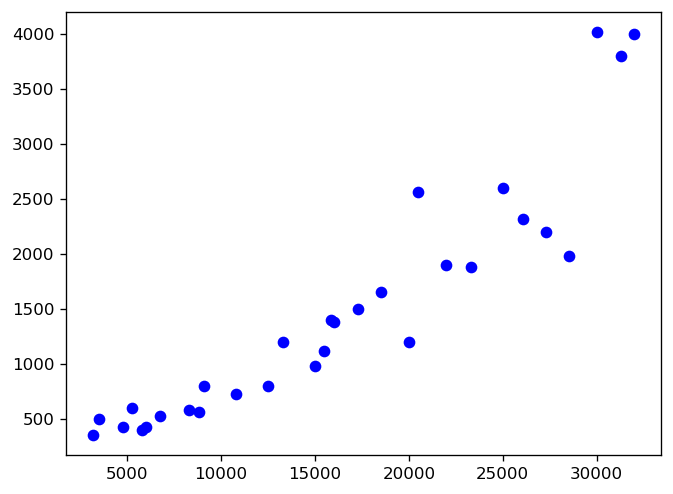

In [20]:
import matplotlib.pyplot as plt

plt.figure(dpi=120)
plt.scatter(x, y, color='blue')
plt.show()

如果需要定量的研究两组数据的相关性，我们可以计算协方差或相关系数，对应的 NumPy 函数分别是`cov`和`corrcoef`。

In [21]:
np.corrcoef(x, y)

array([[1.        , 0.92275889],
       [0.92275889, 1.        ]])

> **说明**：相关系数是一个`-1`到`1`之间的值，越靠近`1` 说明正相关性越强，越靠近`-1`说明负相关性越强，靠近`0`则说明两组数据没有明显的相关性。上面月收入和网购支出之间的相关系数是`0.92275889`，说明二者是强正相关关系。

通过上面的操作，我们确定了收入和网购支出之前存在强正相关关系，于是我们用这些数据来创建一个回归模型，找出一条能够很好的拟合这些数据点的直线。这里，我们就可以用到上面提到的`fit`方法，具体的代码如下所示。

In [22]:
from numpy.polynomial import Polynomial

Polynomial.fit(x, y, deg=1).convert().coef

array([-2.94883437e+02,  1.10333716e-01])

> **说明**：`deg=1`说明回归模型最高次项就是1次项，回归模型形如 $\small{y=ax+b}$ ；如果要生一个类似于 $\small{y=ax^2+bx+c}$ 的模型，就需要设置`deg=2`，以此类推。

根据上面输出的结果，我们的回归方程应该是 $\small{y=0.110333716x-294.883437}$ 。我们将这个回归方程绘制到刚才的散点图上，红色的点是我们的预测值，蓝色的点是历史数据，也就是真实值。

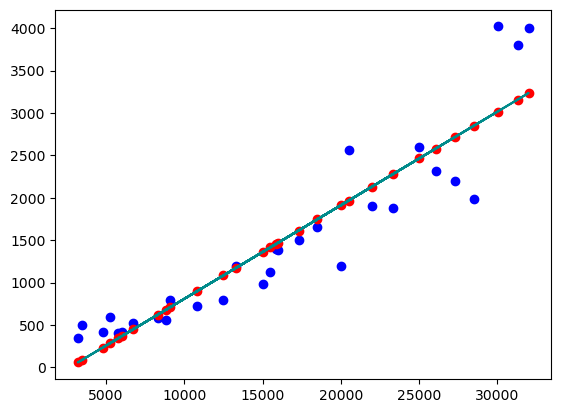

In [23]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='blue')
plt.scatter(x, 0.110333716 * x - 294.883437, color='red')
plt.plot(x, 0.110333716 * x - 294.883437, color='darkcyan')
plt.show()

如果不使用`Polynomial`类型的`fit`方法，我们也可以通过 NumPy 提供的`polyfit`函数来完成同样的操作，有兴趣的可以自行研究。